In [94]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [95]:
# importing the data

data = pd.read_csv("C:/Users/HP/Desktop/DA/Customer Segmentation/Mall_Customers.csv")

In [ ]:
# printing some rows

data.head(5)

In [97]:
# number of rows and columns

data.shape

(200, 5)

In [98]:
# information about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [99]:
# checking missing values

data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# selecting columns for analysis

datapoints = data.iloc[:,[3,4]].values
print(datapoints)

In [101]:
# choosing number of clusters
# WCSS -> Within Clusters Sum Of Squares

# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
  kmeans.fit(datapoints)
  wcss.append(kmeans.inertia_)



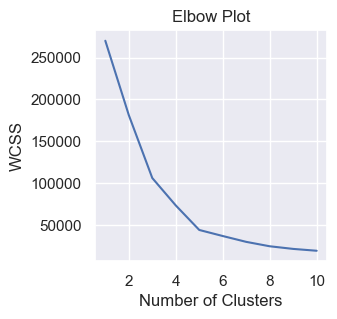

In [103]:
plt.figure(figsize=(3,3))
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Plot")
plt.show()

In [104]:
# Since the graph has a sharp fall at 3 and 5, so we either take 3 or 5 clusters.
# Selecting number of clusters as 3

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# return a label for each datapoint based on cluster
Y = kmeans.fit_predict(datapoints)

print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Spending Score')

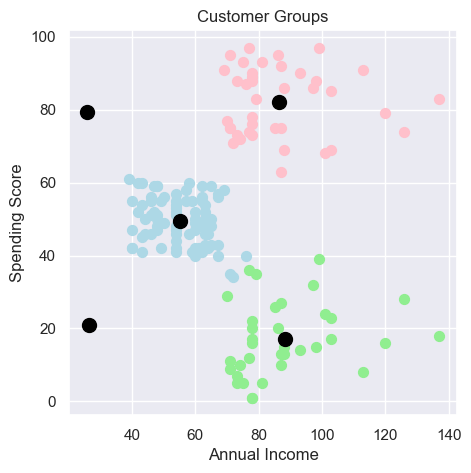

In [114]:
# visualizing the clusters

plt.figure(figsize=(5,5))
plt.scatter(datapoints[Y==0,0], datapoints[Y==0,1], s=50, c="LightGreen", label="Cluster 1")
plt.scatter(datapoints[Y==1,0], datapoints[Y==1,1], s=50, c="LightBlue", label="Cluster 2")
plt.scatter(datapoints[Y==2,0], datapoints[Y==2,1], s=50, c="Pink", label="Cluster 3")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="Black", label="Centroids")

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

In [108]:
# Selecting number of clusters as 5

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each datapoint based on cluster
Y = kmeans.fit_predict(datapoints)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Spending Score')

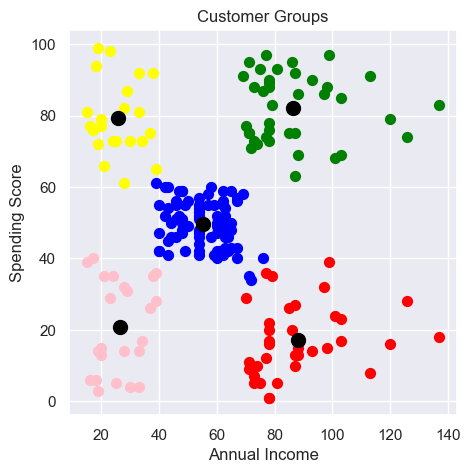

In [115]:
# visualizing the clusters

plt.figure(figsize=(5,5))
plt.scatter(datapoints[Y==0,0], datapoints[Y==0,1], s=50, c="Red", label="Cluster 1")
plt.scatter(datapoints[Y==1,0], datapoints[Y==1,1], s=50, c="Blue", label="Cluster 2")
plt.scatter(datapoints[Y==2,0], datapoints[Y==2,1], s=50, c="Green", label="Cluster 3")
plt.scatter(datapoints[Y==3,0], datapoints[Y==3,1], s=50, c="Yellow", label="Cluster 4")
plt.scatter(datapoints[Y==4,0], datapoints[Y==4,1], s=50, c="Pink", label="Cluster 5")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="Black", label="Centroids")

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")